# CBE 154 Membrane Seperation Lab
Presented by Rahil Shaik, Ethan Mibu, Alex Quemuel, Sneha Kancharla

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Preprocessing

In [69]:
flow_trans = 20 # sho rate

In [70]:
df_n2 = pd.read_csv("data/Membrane Separation Lab Raw Data - Pure NItrogen Transmissibility.csv")
df_o2 = pd.read_csv("data/Membrane Separation Lab Raw Data - Pure Oxygen Transmissibility.csv")

In [71]:
df_n2

,retentate pressure (psig),feed pressure (psig),retentate oxygen purity (%),permeate oxygen purity,feed flow rate (sho-rate),permeate flow rate (SLPM)
0,8.8,10,0,0,NaN,-0.4
1,18.8,20,0,0,NaN,-0.1
2,28.8,30,0,0,NaN,0.2
3,38.4,40,0,0,NaN,0.5
4,48.4,50,0,0,NaN,0.9
5,58.4,60,0,0,NaN,1.3
6,68.1,70,0,0,NaN,1.7
7,78.1,80,0,0,NaN,2.2
8,88.5,90,0,0,NaN,2.7


# Data Analysis Question 1
Determine the transmissibility of pure nitrogen and of pure oxygen by plotting the permeate
flux as a function of the total pressure difference across the membrane, Δp. (You expect a
straight line through the origin.) Are the transmissibilities constant over the entire range of
pressure? What might cause deviation from the ideal expectation? What is the ideal
selectivity of the membrane? Do you expect the type of flow i.e. cocurrent versus
countercurrent to influence your measurement of the transmissibility? Why or why not? It
is a plus to support your analysis with data.

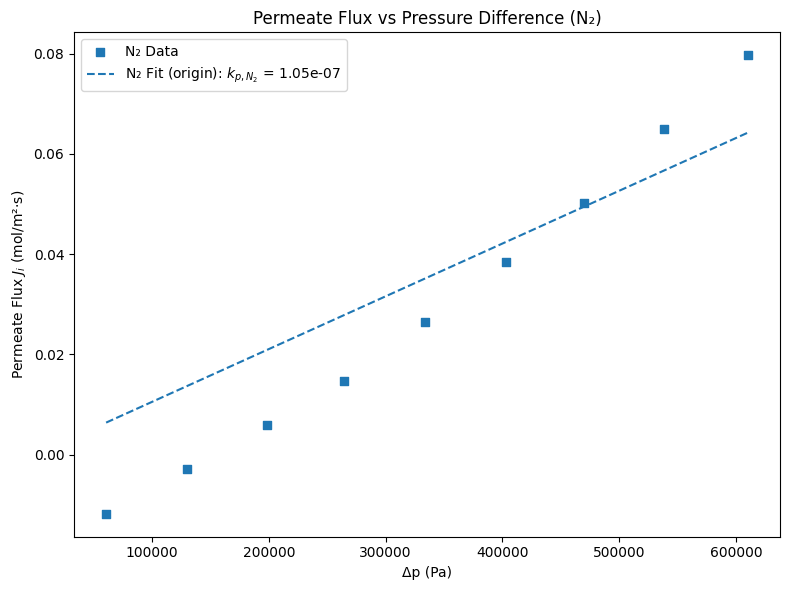

Transmissibility of N₂ (k_p,N2): 1.053e-07 mol/m²·s·Pa


In [72]:
L_per_mol = 22.414  # L/mol at STP
sec_per_min = 60
psig_to_Pa = lambda p: (p + 14.7) * 6894.76  # psig to Pa

def process_flux_data(df):
    df = df.copy()
    df['permeate_flow_mol_s'] = df['permeate flow rate (SLPM)'] / (L_per_mol * sec_per_min)
    df['retentate_pressure_Pa'] = psig_to_Pa(df['retentate pressure (psig)'])
    df['permeate_pressure_Pa'] = psig_to_Pa(0)  # permeate vented to atmosphere
    df['delta_p'] = df['retentate_pressure_Pa'] - df['permeate_pressure_Pa']
    df['membrane_area_m2'] = 0.0252  # eff area for Generon 210
    df['flux'] = df['permeate_flow_mol_s'] / df['membrane_area_m2']
    return df

df_n2 = process_flux_data(df_n2)

# linear fit forced through origin
k_fit_n2 = np.sum(df_n2['delta_p'] * df_n2['flux']) / np.sum(df_n2['delta_p']**2)

plt.figure(figsize=(8, 6))
plt.scatter(df_n2['delta_p'], df_n2['flux'], label='N₂ Data', marker='s')
plt.plot(df_n2['delta_p'], k_fit_n2 * df_n2['delta_p'], '--', label=f'N₂ Fit (origin): $k_{{p,N_2}}$ = {k_fit_n2:.2e}')
plt.xlabel('Δp (Pa)')
plt.ylabel('Permeate Flux $J_i$ (mol/m²·s)')
plt.title('Permeate Flux vs Pressure Difference (N₂)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Transmissibility of N₂ (k_p,N2): {k_fit_n2:.3e} mol/m²·s·Pa")

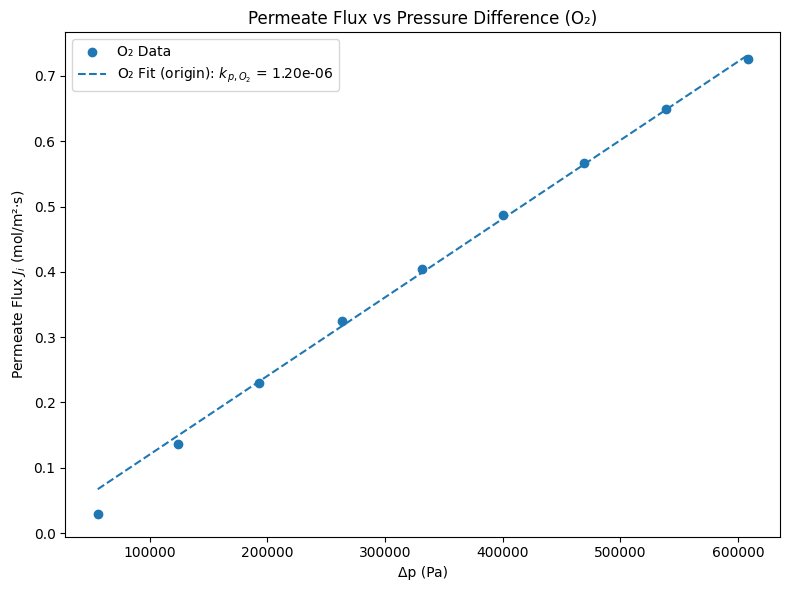

Transmissibility of O₂ (k_p,O2): 1.203e-06 mol/m²·s·Pa


In [73]:
def process_flux_data_o2(df):
    df = df.copy()
    df['permeate_flow_mol_s'] = df['permeate flow rate (SLPM)'] / (L_per_mol * sec_per_min)
    df['retentate_pressure_Pa'] = psig_to_Pa(df['retentate pressure (psig)'])
    df['permeate_pressure_Pa'] = psig_to_Pa(0)  # permeate vented to atmosphere
    df['delta_p'] = df['retentate_pressure_Pa'] - df['permeate_pressure_Pa']
    df['membrane_area_m2'] = 0.0252  # eff area for Generon 210
    df['flux'] = df['permeate_flow_mol_s'] / df['membrane_area_m2']
    return df

df_o2 = process_flux_data_o2(df_o2)

# linear fit forced through origin
k_fit_o2 = np.sum(df_o2['delta_p'] * df_o2['flux']) / np.sum(df_o2['delta_p']**2)

plt.figure(figsize=(8, 6))
plt.scatter(df_o2['delta_p'], df_o2['flux'], label='O₂ Data', marker='o')
plt.plot(df_o2['delta_p'], k_fit_o2 * df_o2['delta_p'], '--', label=f'O₂ Fit (origin): $k_{{p,O_2}}$ = {k_fit_o2:.2e}')
plt.xlabel('Δp (Pa)')
plt.ylabel('Permeate Flux $J_i$ (mol/m²·s)')
plt.title('Permeate Flux vs Pressure Difference (O₂)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Transmissibility of O₂ (k_p,O2): {k_fit_o2:.3e} mol/m²·s·Pa")

In [74]:
ideal_selectivity = k_fit_o2 / k_fit_n2
print(f"Ideal Selectivity (α_O2/N2) = {ideal_selectivity:.2f}")

Ideal Selectivity (α_O2/N2) = 11.43
